In [3]:
%load_ext autoreload
%autoreload 2

import transfer_learn
import tensorflow as tf
import tensorflow_io as tfio
import tensorflow_hub as hub
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
import seaborn as sns
import main as mn
import utils_asr
import pandas as pd

tf.random.set_seed(1234)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Spectrograms

In [5]:
history, model, train_ds, val_ds, test_ds = mn.main('../cursedataset-resampled', mode='specs', val_split=0.2, test_split=0.1, batch_size=128, epochs=100)
path_model = '../models/specs-no-aug-val20-test10-batch128'
model.save(path_model+'.h5')
#utils_asr.save_history(history, path_model+'_history.csv')

Using path:  ../cursedataset-resampled
Number of samples:  11290
Input shape: (124, 129, 1)
Model: "curseword_detector"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing_3 (Resizing)       (None, 32, 32, 1)         0         
                                                                 
 conv2d_6 (Conv2D)           (None, 30, 30, 32)        320       
                                                                 
 conv2d_7 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 14, 14, 64)        0         
                                                                 
 flatten_3 (Flatten)  

2022-06-07 23:26:19.620322: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 1 of 1000
2022-06-07 23:26:20.662501: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


First sample size ((128, 124, 129, 1)), label ([0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0])
Epoch 1/100
62/62 [==============================] - 18s 254ms/step - loss: 0.6208 - tp: 442.0000 - fp: 2533.0000 - tn: 4698.0000 - fn: 230.0000 - accuracy: 0.6504 - precision: 0.1486 - recall: 0.6577 - auc: 0.7013 - prc: 0.1676 - val_loss: 0.4278 - val_tp: 55.0000 - val_fp: 189.0000 - val_tn: 836.0000 - val_fn: 49.0000 - val_accuracy: 0.7892 - val_precision: 0.2254 - val_recall: 0.5288 - val_auc: 0.7747 - val_prc: 0.2448
Epoch 2/100
62/62 [==============================] - 16s 239ms/step - loss: 0.5374 - tp: 513.0000 - fp: 2232.0000 - tn: 4989.0000 - fn: 169.0000 - accuracy: 0.6962 - precision: 0.1869 - recall: 0.7522 - auc: 0.8033 - prc: 0.2578 - val_loss: 0.5262 - val_tp: 77.0000

2022-06-07 23:39:58.540361: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 1 of 1000
2022-06-07 23:39:59.658608: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


62/62 [==============================] - 22s 342ms/step - loss: 0.0841 - tp: 645.0000 - fp: 201.0000 - tn: 7033.0000 - fn: 24.0000 - accuracy: 0.9715 - precision: 0.7624 - recall: 0.9641 - auc: 0.9957 - prc: 0.9632 - val_loss: 0.0437 - val_tp: 101.0000 - val_fp: 17.0000 - val_tn: 1011.0000 - val_fn: 0.0000e+00 - val_accuracy: 0.9849 - val_precision: 0.8559 - val_recall: 1.0000 - val_auc: 0.9998 - val_prc: 0.9980
Epoch 53/100
62/62 [==============================] - 22s 337ms/step - loss: 0.0745 - tp: 660.0000 - fp: 191.0000 - tn: 7033.0000 - fn: 19.0000 - accuracy: 0.9734 - precision: 0.7756 - recall: 0.9720 - auc: 0.9965 - prc: 0.9634 - val_loss: 0.0374 - val_tp: 98.0000 - val_fp: 9.0000 - val_tn: 1022.0000 - val_fn: 0.0000e+00 - val_accuracy: 0.9920 - val_precision: 0.9159 - val_recall: 1.0000 - val_auc: 0.9996 - val_prc: 0.9955
Epoch 54/100
62/62 [==============================] - 17s 267ms/step - loss: 0.0704 - tp: 680.0000 - fp: 205.0000 - tn: 7004.0000 - fn: 14.0000 - accuracy: 0

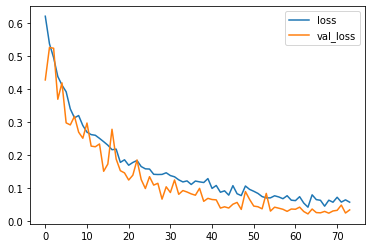

In [6]:
utils_asr.plot_training(history, metric='loss')

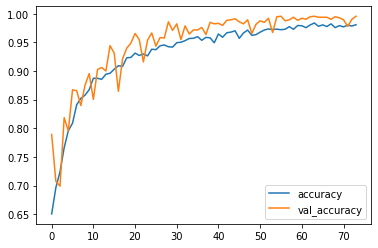

In [7]:
utils_asr.plot_training(history, metric='accuracy')

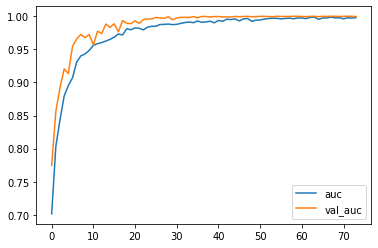

In [12]:
utils_asr.plot_training(history, metric='auc')

In [18]:
history.history.keys()

dict_keys(['loss', 'tp', 'fp', 'tn', 'fn', 'accuracy', 'precision', 'recall', 'auc', 'prc', 'val_loss', 'val_tp', 'val_fp', 'val_tn', 'val_fn', 'val_accuracy', 'val_precision', 'val_recall', 'val_auc', 'val_prc'])

In [22]:
history.history['fp'][-1]
history.history['tp'][-1]
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

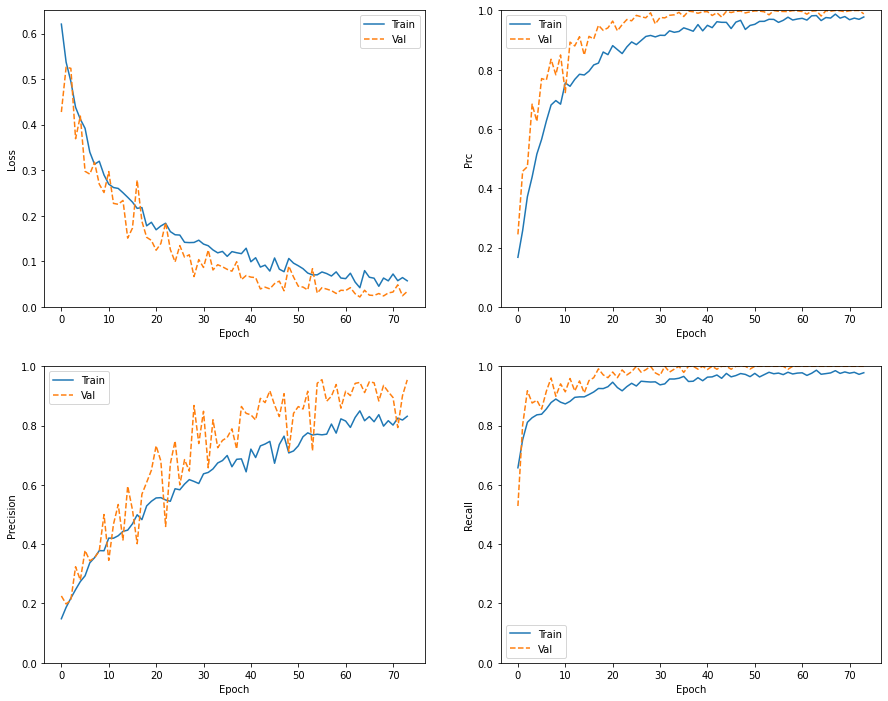

In [32]:
utils_asr.plot_metrics(history)

100%|██████████| 1129/1129 [00:46<00:00, 24.39it/s]


Test set accuracy: 99%


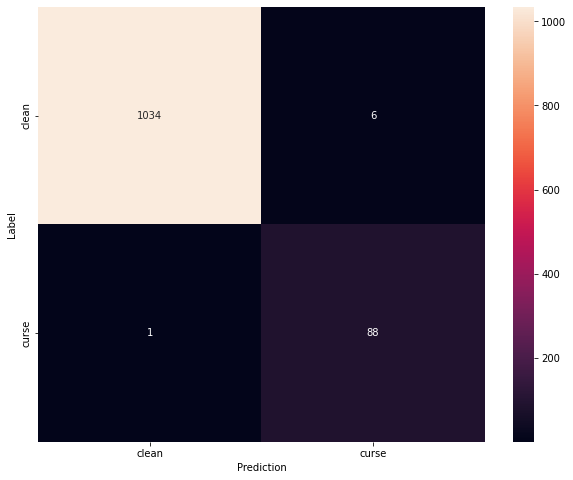

In [9]:
utils_asr.inference(classifier=model, test_ds=test_ds)

## Transfer learning

### Yamnet

In [2]:
history, model, train_ds, val_ds, test_ds = mn.main('../cursedataset-resampled', mode='transfer_yamn', val_split=0.25, test_split=0.05, batch_size=64, epochs=50)

Using path:  ../cursedataset-resampled
Number of samples:  11290


2022-06-07 20:18:47.227613: I tensorflow_io/core/kernels/cpu_check.cc:128] Your CPU supports instructions that this TensorFlow IO binary was not compiled to use: AVX2 FMA


Input shape: (3072,)
Model: "curseword_detector"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              3146752   
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                32832     
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)           

2022-06-07 20:20:16.572023: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 1 of 1000
2022-06-07 20:20:16.572093: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 2 of 1000
2022-06-07 20:20:16.584032: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 3 of 1000
2022-06-07 20:20:16.589281: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 4 of 1000
2022-06-07 20:20:16.648880: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 5 of 1000
2022-06-07 20:20:16.648984: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 6 of 1000
2022-06-07 20:20:16.649002: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this 

First sample size ((64, 3072)), label ([0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0])
Epoch 1/50


2022-06-07 20:20:21.141302: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


  1/124 [..............................] - ETA: 23:31 - loss: 2.0649 - tp: 1.0000 - fp: 29.0000 - tn: 31.0000 - fn: 3.0000 - accuracy: 0.5000 - precision: 0.0333 - recall: 0.2500 - auc: 0.3812 - prc: 0.0465

2022-06-07 20:20:32.573896: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


124/124 [==============================] - ETA: 0s - loss: 2.0939 - tp: 373.0000 - fp: 3330.0000 - tn: 3889.0000 - fn: 312.0000 - accuracy: 0.5392 - precision: 0.1007 - recall: 0.5445 - auc: 0.5431 - prc: 0.0972

2022-06-07 20:22:52.724292: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 1 of 1000
2022-06-07 20:22:52.724397: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 2 of 1000
2022-06-07 20:22:52.724465: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 3 of 1000
2022-06-07 20:22:52.724477: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 4 of 1000
2022-06-07 20:22:52.724481: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 5 of 1000
2022-06-07 20:22:52.724485: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 6 of 1000
2022-06-07 20:22:52.724500: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this 

124/124 [==============================] - 156s 1s/step - loss: 2.0939 - tp: 373.0000 - fp: 3330.0000 - tn: 3889.0000 - fn: 312.0000 - accuracy: 0.5392 - precision: 0.1007 - recall: 0.5445 - auc: 0.5431 - prc: 0.0972 - val_loss: 0.6083 - val_tp: 39.0000 - val_fp: 168.0000 - val_tn: 340.0000 - val_fn: 17.0000 - val_accuracy: 0.6720 - val_precision: 0.1884 - val_recall: 0.6964 - val_auc: 0.6944 - val_prc: 0.1661
Epoch 2/50


2022-06-07 20:22:56.942531: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


123/124 [============================>.] - ETA: 0s - loss: 0.8859 - tp: 390.0000 - fp: 3463.0000 - tn: 3728.0000 - fn: 291.0000 - accuracy: 0.5231 - precision: 0.1012 - recall: 0.5727 - auc: 0.5464 - prc: 0.0965

2022-06-07 20:25:30.807086: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 1 of 1000
2022-06-07 20:25:30.809393: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 2 of 1000
2022-06-07 20:25:30.817083: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 3 of 1000
2022-06-07 20:25:30.834220: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 4 of 1000
2022-06-07 20:25:30.837321: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 5 of 1000
2022-06-07 20:25:30.849028: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 6 of 1000
2022-06-07 20:25:30.851518: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this 

124/124 [==============================] - 159s 1s/step - loss: 0.8879 - tp: 391.0000 - fp: 3475.0000 - tn: 3745.0000 - fn: 293.0000 - accuracy: 0.5233 - precision: 0.1011 - recall: 0.5716 - auc: 0.5458 - prc: 0.0965 - val_loss: 0.6513 - val_tp: 18.0000 - val_fp: 168.0000 - val_tn: 364.0000 - val_fn: 14.0000 - val_accuracy: 0.6773 - val_precision: 0.0968 - val_recall: 0.5625 - val_auc: 0.6374 - val_prc: 0.0866
Epoch 3/50


2022-06-07 20:25:35.828698: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


122/124 [============================>.] - ETA: 0s - loss: 0.8393 - tp: 369.0000 - fp: 3492.0000 - tn: 3638.0000 - fn: 309.0000 - accuracy: 0.5132 - precision: 0.0956 - recall: 0.5442 - auc: 0.5391 - prc: 0.0945

2022-06-07 20:28:05.283509: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 1 of 1000
2022-06-07 20:28:05.283629: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 2 of 1000
2022-06-07 20:28:05.283657: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 3 of 1000
2022-06-07 20:28:05.293693: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 4 of 1000
2022-06-07 20:28:05.301654: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 5 of 1000
2022-06-07 20:28:05.373876: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 6 of 1000
2022-06-07 20:28:05.374012: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this 

124/124 [==============================] - 154s 1s/step - loss: 0.8385 - tp: 375.0000 - fp: 3532.0000 - tn: 3685.0000 - fn: 312.0000 - accuracy: 0.5137 - precision: 0.0960 - recall: 0.5459 - auc: 0.5399 - prc: 0.0947 - val_loss: 0.6198 - val_tp: 18.0000 - val_fp: 159.0000 - val_tn: 368.0000 - val_fn: 19.0000 - val_accuracy: 0.6844 - val_precision: 0.1017 - val_recall: 0.4865 - val_auc: 0.6456 - val_prc: 0.0972
Epoch 4/50


2022-06-07 20:28:09.400103: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


123/124 [============================>.] - ETA: 0s - loss: 0.8158 - tp: 321.0000 - fp: 3467.0000 - tn: 3744.0000 - fn: 340.0000 - accuracy: 0.5164 - precision: 0.0847 - recall: 0.4856 - auc: 0.5121 - prc: 0.0843

2022-06-07 20:30:36.516525: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 1 of 1000
2022-06-07 20:30:36.542463: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 2 of 1000
2022-06-07 20:30:36.542548: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 3 of 1000
2022-06-07 20:30:36.560096: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 4 of 1000
2022-06-07 20:30:36.567895: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 5 of 1000
2022-06-07 20:30:36.567975: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 6 of 1000
2022-06-07 20:30:36.567996: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this 

124/124 [==============================] - 151s 1s/step - loss: 0.8154 - tp: 323.0000 - fp: 3481.0000 - tn: 3759.0000 - fn: 341.0000 - accuracy: 0.5164 - precision: 0.0849 - recall: 0.4864 - auc: 0.5128 - prc: 0.0847 - val_loss: 0.5925 - val_tp: 18.0000 - val_fp: 164.0000 - val_tn: 361.0000 - val_fn: 21.0000 - val_accuracy: 0.6720 - val_precision: 0.0989 - val_recall: 0.4615 - val_auc: 0.5784 - val_prc: 0.0874
Epoch 5/50


2022-06-07 20:30:40.854324: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


121/124 [============================>.] - ETA: 1s - loss: 0.7703 - tp: 366.0000 - fp: 3331.0000 - tn: 3747.0000 - fn: 300.0000 - accuracy: 0.5311 - precision: 0.0990 - recall: 0.5495 - auc: 0.5656 - prc: 0.1057

2022-06-07 20:33:07.258121: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 1 of 1000
2022-06-07 20:33:07.260051: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 2 of 1000
2022-06-07 20:33:07.260133: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 3 of 1000
2022-06-07 20:33:07.290143: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 4 of 1000
2022-06-07 20:33:07.290228: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 5 of 1000
2022-06-07 20:33:07.316578: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 6 of 1000
2022-06-07 20:33:07.316685: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this 

124/124 [==============================] - 150s 1s/step - loss: 0.7761 - tp: 375.0000 - fp: 3365.0000 - tn: 3853.0000 - fn: 311.0000 - accuracy: 0.5349 - precision: 0.1003 - recall: 0.5466 - auc: 0.5638 - prc: 0.1059 - val_loss: 0.5720 - val_tp: 32.0000 - val_fp: 169.0000 - val_tn: 342.0000 - val_fn: 21.0000 - val_accuracy: 0.6631 - val_precision: 0.1592 - val_recall: 0.6038 - val_auc: 0.6479 - val_prc: 0.1600
Epoch 6/50


2022-06-07 20:33:11.376553: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


123/124 [============================>.] - ETA: 0s - loss: 0.7980 - tp: 400.0000 - fp: 3447.0000 - tn: 3717.0000 - fn: 308.0000 - accuracy: 0.5230 - precision: 0.1040 - recall: 0.5650 - auc: 0.5527 - prc: 0.1015

2022-06-07 20:35:33.855319: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 1 of 1000
2022-06-07 20:35:33.855483: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 2 of 1000
2022-06-07 20:35:33.859869: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 3 of 1000
2022-06-07 20:35:33.863976: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 4 of 1000
2022-06-07 20:35:33.865052: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 5 of 1000
2022-06-07 20:35:33.865208: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 6 of 1000
2022-06-07 20:35:33.917604: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this 

124/124 [==============================] - 147s 1s/step - loss: 0.7974 - tp: 401.0000 - fp: 3461.0000 - tn: 3733.0000 - fn: 309.0000 - accuracy: 0.5230 - precision: 0.1038 - recall: 0.5648 - auc: 0.5527 - prc: 0.1013 - val_loss: 0.6371 - val_tp: 23.0000 - val_fp: 135.0000 - val_tn: 369.0000 - val_fn: 37.0000 - val_accuracy: 0.6950 - val_precision: 0.1456 - val_recall: 0.3833 - val_auc: 0.5715 - val_prc: 0.1312
Epoch 7/50


2022-06-07 20:35:38.043539: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


122/124 [============================>.] - ETA: 0s - loss: 0.7841 - tp: 362.0000 - fp: 3486.0000 - tn: 3648.0000 - fn: 312.0000 - accuracy: 0.5136 - precision: 0.0941 - recall: 0.5371 - auc: 0.5369 - prc: 0.0962

2022-06-07 20:38:01.073137: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 1 of 1000
2022-06-07 20:38:01.086031: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 2 of 1000
2022-06-07 20:38:01.086133: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 3 of 1000
2022-06-07 20:38:01.087115: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 4 of 1000
2022-06-07 20:38:01.112631: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 5 of 1000
2022-06-07 20:38:01.112752: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 6 of 1000
2022-06-07 20:38:01.145542: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this 

124/124 [==============================] - 147s 1s/step - loss: 0.7857 - tp: 365.0000 - fp: 3508.0000 - tn: 3713.0000 - fn: 318.0000 - accuracy: 0.5159 - precision: 0.0942 - recall: 0.5344 - auc: 0.5363 - prc: 0.0961 - val_loss: 0.6115 - val_tp: 26.0000 - val_fp: 156.0000 - val_tn: 351.0000 - val_fn: 31.0000 - val_accuracy: 0.6684 - val_precision: 0.1429 - val_recall: 0.4561 - val_auc: 0.5791 - val_prc: 0.1280
Epoch 8/50


2022-06-07 20:38:05.083822: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


123/124 [============================>.] - ETA: 0s - loss: 0.7981 - tp: 381.0000 - fp: 3561.0000 - tn: 3593.0000 - fn: 337.0000 - accuracy: 0.5048 - precision: 0.0967 - recall: 0.5306 - auc: 0.5352 - prc: 0.1016

2022-06-07 20:40:32.679364: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 1 of 1000
2022-06-07 20:40:32.679639: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 2 of 1000
2022-06-07 20:40:32.679665: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 3 of 1000
2022-06-07 20:40:32.679672: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 4 of 1000
2022-06-07 20:40:32.679678: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 5 of 1000
2022-06-07 20:40:32.691390: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 6 of 1000
2022-06-07 20:40:32.692132: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this 

124/124 [==============================] - 152s 1s/step - loss: 0.7973 - tp: 383.0000 - fp: 3574.0000 - tn: 3610.0000 - fn: 337.0000 - accuracy: 0.5052 - precision: 0.0968 - recall: 0.5319 - auc: 0.5354 - prc: 0.1015 - val_loss: 0.7226 - val_tp: 27.0000 - val_fp: 157.0000 - val_tn: 359.0000 - val_fn: 21.0000 - val_accuracy: 0.6844 - val_precision: 0.1467 - val_recall: 0.5625 - val_auc: 0.6518 - val_prc: 0.1361
Epoch 9/50


2022-06-07 20:40:37.576178: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


123/124 [============================>.] - ETA: 0s - loss: 0.7579 - tp: 361.0000 - fp: 3479.0000 - tn: 3714.0000 - fn: 318.0000 - accuracy: 0.5177 - precision: 0.0940 - recall: 0.5317 - auc: 0.5443 - prc: 0.0999

2022-06-07 20:43:04.810255: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 1 of 1000
2022-06-07 20:43:04.817941: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 2 of 1000
2022-06-07 20:43:04.843971: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 3 of 1000
2022-06-07 20:43:04.844195: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 4 of 1000
2022-06-07 20:43:04.844269: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 5 of 1000
2022-06-07 20:43:04.844291: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 6 of 1000
2022-06-07 20:43:04.849840: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this 

124/124 [==============================] - 152s 1s/step - loss: 0.7560 - tp: 361.0000 - fp: 3489.0000 - tn: 3736.0000 - fn: 318.0000 - accuracy: 0.5183 - precision: 0.0938 - recall: 0.5317 - auc: 0.5450 - prc: 0.0997 - val_loss: 0.5810 - val_tp: 27.0000 - val_fp: 163.0000 - val_tn: 350.0000 - val_fn: 24.0000 - val_accuracy: 0.6684 - val_precision: 0.1421 - val_recall: 0.5294 - val_auc: 0.6361 - val_prc: 0.1297
Epoch 10/50


2022-06-07 20:43:09.234541: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


122/124 [============================>.] - ETA: 0s - loss: 0.7274 - tp: 350.0000 - fp: 3190.0000 - tn: 3957.0000 - fn: 311.0000 - accuracy: 0.5516 - precision: 0.0989 - recall: 0.5295 - auc: 0.5614 - prc: 0.1012

2022-06-07 20:45:32.966526: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 1 of 1000
2022-06-07 20:45:32.969536: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 2 of 1000
2022-06-07 20:45:32.981842: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 3 of 1000
2022-06-07 20:45:32.995769: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 4 of 1000
2022-06-07 20:45:32.997454: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 5 of 1000
2022-06-07 20:45:33.014488: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 6 of 1000
2022-06-07 20:45:33.065859: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this 

124/124 [==============================] - 148s 1s/step - loss: 0.7255 - tp: 354.0000 - fp: 3219.0000 - tn: 4017.0000 - fn: 314.0000 - accuracy: 0.5530 - precision: 0.0991 - recall: 0.5299 - auc: 0.5630 - prc: 0.1015 - val_loss: 0.5822 - val_tp: 16.0000 - val_fp: 164.0000 - val_tn: 359.0000 - val_fn: 25.0000 - val_accuracy: 0.6649 - val_precision: 0.0889 - val_recall: 0.3902 - val_auc: 0.6243 - val_prc: 0.0940
Epoch 11/50


2022-06-07 20:45:37.188406: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


121/124 [============================>.] - ETA: 1s - loss: 0.7377 - tp: 377.0000 - fp: 3363.0000 - tn: 3712.0000 - fn: 292.0000 - accuracy: 0.5280 - precision: 0.1008 - recall: 0.5635 - auc: 0.5520 - prc: 0.0997

2022-06-07 20:48:03.403005: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 1 of 1000
2022-06-07 20:48:03.403229: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 2 of 1000
2022-06-07 20:48:03.412816: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 3 of 1000
2022-06-07 20:48:03.413406: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 4 of 1000
2022-06-07 20:48:03.413437: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 5 of 1000
2022-06-07 20:48:03.413444: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 6 of 1000
2022-06-07 20:48:03.425577: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this 

124/124 [==============================] - 151s 1s/step - loss: 0.7400 - tp: 387.0000 - fp: 3432.0000 - tn: 3782.0000 - fn: 303.0000 - accuracy: 0.5275 - precision: 0.1013 - recall: 0.5609 - auc: 0.5528 - prc: 0.1009 - val_loss: 0.7024 - val_tp: 31.0000 - val_fp: 157.0000 - val_tn: 350.0000 - val_fn: 26.0000 - val_accuracy: 0.6755 - val_precision: 0.1649 - val_recall: 0.5439 - val_auc: 0.6764 - val_prc: 0.1556
Epoch 12/50


2022-06-07 20:48:07.814045: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


122/124 [============================>.] - ETA: 0s - loss: 0.7258 - tp: 405.0000 - fp: 3419.0000 - tn: 3698.0000 - fn: 286.0000 - accuracy: 0.5255 - precision: 0.1059 - recall: 0.5861 - auc: 0.5702 - prc: 0.1090

2022-06-07 20:50:34.556499: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 1 of 1000
2022-06-07 20:50:34.556599: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 2 of 1000
2022-06-07 20:50:34.556614: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 3 of 1000
2022-06-07 20:50:34.573263: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 4 of 1000
2022-06-07 20:50:34.585434: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 5 of 1000
2022-06-07 20:50:34.605337: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 6 of 1000
2022-06-07 20:50:34.605471: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this 

124/124 [==============================] - 151s 1s/step - loss: 0.7248 - tp: 409.0000 - fp: 3456.0000 - tn: 3751.0000 - fn: 288.0000 - accuracy: 0.5263 - precision: 0.1058 - recall: 0.5868 - auc: 0.5700 - prc: 0.1085 - val_loss: 0.5802 - val_tp: 22.0000 - val_fp: 140.0000 - val_tn: 381.0000 - val_fn: 21.0000 - val_accuracy: 0.7145 - val_precision: 0.1358 - val_recall: 0.5116 - val_auc: 0.6858 - val_prc: 0.1652
Epoch 13/50


2022-06-07 20:50:38.788545: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


123/124 [============================>.] - ETA: 0s - loss: 0.7079 - tp: 405.0000 - fp: 3313.0000 - tn: 3878.0000 - fn: 276.0000 - accuracy: 0.5441 - precision: 0.1089 - recall: 0.5947 - auc: 0.5829 - prc: 0.1067

2022-06-07 20:52:58.840733: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 1 of 1000
2022-06-07 20:52:58.840860: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 2 of 1000
2022-06-07 20:52:58.857829: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 3 of 1000
2022-06-07 20:52:58.857938: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 4 of 1000
2022-06-07 20:52:58.868471: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 5 of 1000
2022-06-07 20:52:58.868641: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 6 of 1000
2022-06-07 20:52:58.871758: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this 

124/124 [==============================] - 144s 1s/step - loss: 0.7087 - tp: 407.0000 - fp: 3326.0000 - tn: 3893.0000 - fn: 278.0000 - accuracy: 0.5440 - precision: 0.1090 - recall: 0.5942 - auc: 0.5824 - prc: 0.1068 - val_loss: 0.6155 - val_tp: 22.0000 - val_fp: 165.0000 - val_tn: 361.0000 - val_fn: 16.0000 - val_accuracy: 0.6791 - val_precision: 0.1176 - val_recall: 0.5789 - val_auc: 0.6754 - val_prc: 0.1086
Epoch 14/50


2022-06-07 20:53:03.305950: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


123/124 [============================>.] - ETA: 0s - loss: 0.7125 - tp: 386.0000 - fp: 3449.0000 - tn: 3751.0000 - fn: 286.0000 - accuracy: 0.5255 - precision: 0.1007 - recall: 0.5744 - auc: 0.5662 - prc: 0.1009

2022-06-07 20:55:30.222194: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 1 of 1000
2022-06-07 20:55:30.226166: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 2 of 1000
2022-06-07 20:55:30.275220: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 3 of 1000
2022-06-07 20:55:30.275357: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 4 of 1000
2022-06-07 20:55:30.275399: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 5 of 1000
2022-06-07 20:55:30.275415: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 6 of 1000
2022-06-07 20:55:30.277744: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this 

124/124 [==============================] - 151s 1s/step - loss: 0.7121 - tp: 387.0000 - fp: 3465.0000 - tn: 3765.0000 - fn: 287.0000 - accuracy: 0.5253 - precision: 0.1005 - recall: 0.5742 - auc: 0.5661 - prc: 0.1008 - val_loss: 0.7396 - val_tp: 58.0000 - val_fp: 497.0000 - val_tn: 9.0000 - val_fn: 0.0000e+00 - val_accuracy: 0.1188 - val_precision: 0.1045 - val_recall: 1.0000 - val_auc: 0.6667 - val_prc: 0.1533
Epoch 15/50


2022-06-07 20:55:34.661121: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


123/124 [============================>.] - ETA: 0s - loss: 0.7076 - tp: 371.0000 - fp: 3251.0000 - tn: 3944.0000 - fn: 306.0000 - accuracy: 0.5481 - precision: 0.1024 - recall: 0.5480 - auc: 0.5681 - prc: 0.1086

2022-06-07 20:58:03.740683: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 1 of 1000
2022-06-07 20:58:03.752378: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 2 of 1000
2022-06-07 20:58:03.838349: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 3 of 1000
2022-06-07 20:58:03.838449: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 4 of 1000
2022-06-07 20:58:03.838466: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 5 of 1000
2022-06-07 20:58:03.840225: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 6 of 1000
2022-06-07 20:58:03.840295: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this 

124/124 [==============================] - 154s 1s/step - loss: 0.7075 - tp: 374.0000 - fp: 3268.0000 - tn: 3955.0000 - fn: 307.0000 - accuracy: 0.5477 - precision: 0.1027 - recall: 0.5492 - auc: 0.5694 - prc: 0.1093 - val_loss: 0.6845 - val_tp: 18.0000 - val_fp: 154.0000 - val_tn: 375.0000 - val_fn: 17.0000 - val_accuracy: 0.6968 - val_precision: 0.1047 - val_recall: 0.5143 - val_auc: 0.6952 - val_prc: 0.1018


2022-06-07 20:58:08.521674: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


In [7]:
path_model = '../models/yamn-no-aug-val25-test05-batch64'
model.save(path_model+'.h5')
utils_asr.save_history(history, path_model+'_history.csv')

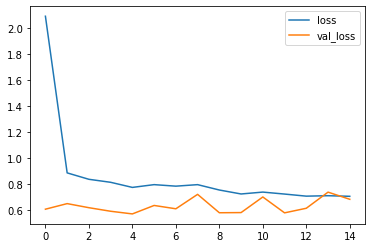

In [3]:
utils_asr.plot_training(history, metric='loss')

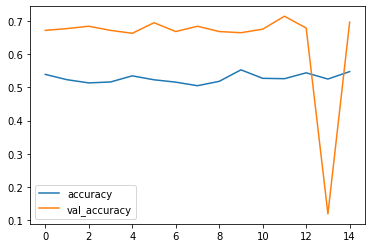

In [4]:
utils_asr.plot_training(history, metric='accuracy')

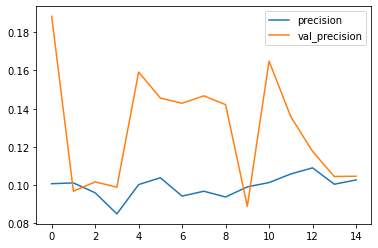

In [5]:
utils_asr.plot_training(history, metric='precision')

100%|██████████| 564/564 [01:26<00:00,  6.55it/s]


Test set accuracy: 69%


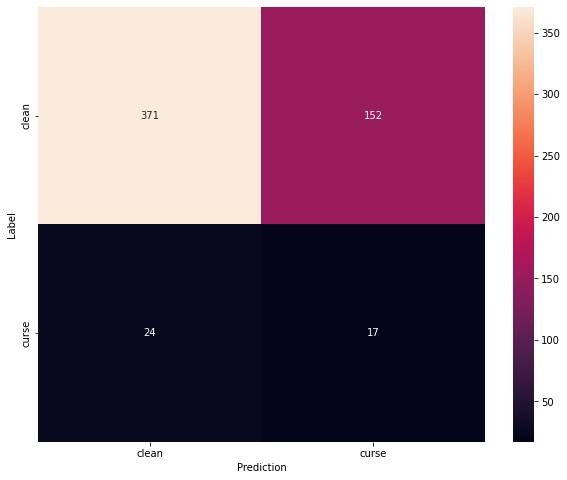

In [6]:
utils_asr.inference(classifier=model, test_ds=test_ds)

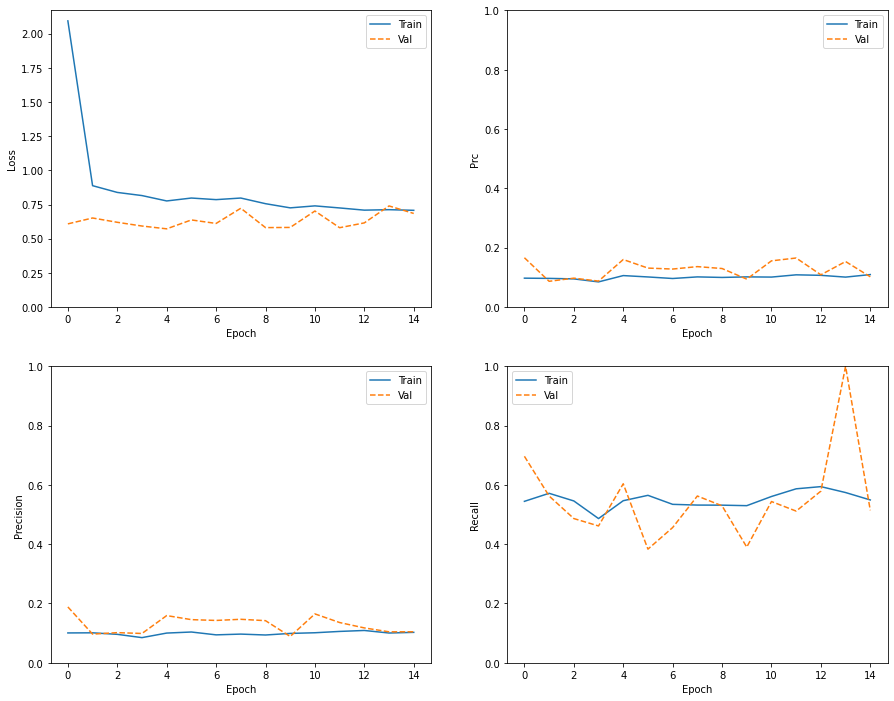

In [10]:
utils_asr.plot_metrics_from_pd(pd.read_csv("../models/yamn-no-aug-val25-test05-batch64_history.csv"))

### EfficientNet B0

In [3]:
history, model, train_ds, val_ds, test_ds = mn.main('../cursedataset-resampled', mode='transfer_effb0', val_split=0.25, test_split=0.05, batch_size=64, epochs=50)

Using path:  ../cursedataset-resampled
Number of samples:  11290


2022-06-08 11:12:44.954967: I tensorflow_io/core/kernels/cpu_check.cc:128] Your CPU supports instructions that this TensorFlow IO binary was not compiled to use: AVX2 FMA


Input shape: (124, 129, 3)
Input range tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(12.788579, shape=(), dtype=float32)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional)  (None, 4, 5, 1280)       4049571   
                                                                 
 avg_pool (GlobalAveragePool  (None, 1280)             0         
 ing2D)                                                          
                                                                 
 batch_normalization (BatchN  (None, 1280)             5120      
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 512)               655872    
                                                                 
 dropout (Dropout)           (None, 512)               0       

2022-06-08 11:12:58.208109: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 295 of 1000


First sample size ((64, 124, 129, 3)), label ([0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0])
Epoch 1/50


2022-06-08 11:12:58.770611: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.
2022-06-08 11:13:07.903828: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100
2022-06-08 11:13:11.321797: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


  2/124 [..............................] - ETA: 8s - loss: 1.1419 - tp: 6.0000 - fp: 55.0000 - tn: 59.0000 - fn: 8.0000 - accuracy: 0.5078 - precision: 0.0984 - recall: 0.4286 - auc: 0.5608 - prc: 0.1209   

2022-06-08 11:13:19.190197: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


124/124 [==============================] - 43s 180ms/step - loss: 1.2786 - tp: 419.0000 - fp: 2960.0000 - tn: 4259.0000 - fn: 266.0000 - accuracy: 0.5919 - precision: 0.1240 - recall: 0.6117 - auc: 0.6267 - prc: 0.1269 - val_loss: 0.8229 - val_tp: 52.0000 - val_fp: 407.0000 - val_tn: 101.0000 - val_fn: 4.0000 - val_accuracy: 0.2713 - val_precision: 0.1133 - val_recall: 0.9286 - val_auc: 0.6666 - val_prc: 0.1925
Epoch 2/50
124/124 [==============================] - 21s 165ms/step - loss: 1.0408 - tp: 413.0000 - fp: 2790.0000 - tn: 4430.0000 - fn: 271.0000 - accuracy: 0.6127 - precision: 0.1289 - recall: 0.6038 - auc: 0.6478 - prc: 0.1521 - val_loss: 0.5550 - val_tp: 19.0000 - val_fp: 85.0000 - val_tn: 447.0000 - val_fn: 13.0000 - val_accuracy: 0.8262 - val_precision: 0.1827 - val_recall: 0.5938 - val_auc: 0.7855 - val_prc: 0.1626
Epoch 3/50
124/124 [==============================] - 21s 158ms/step - loss: 0.8194 - tp: 441.0000 - fp: 2627.0000 - tn: 4590.0000 - fn: 246.0000 - accuracy: 0

2022-06-08 11:17:27.003742: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 1 of 1000
2022-06-08 11:17:27.455163: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


124/124 [==============================] - 23s 178ms/step - loss: 0.5790 - tp: 487.0000 - fp: 2095.0000 - tn: 5112.0000 - fn: 210.0000 - accuracy: 0.7084 - precision: 0.1886 - recall: 0.6987 - auc: 0.7783 - prc: 0.3063 - val_loss: 0.5698 - val_tp: 34.0000 - val_fp: 133.0000 - val_tn: 388.0000 - val_fn: 9.0000 - val_accuracy: 0.7482 - val_precision: 0.2036 - val_recall: 0.7907 - val_auc: 0.8414 - val_prc: 0.3401
Epoch 13/50
124/124 [==============================] - 21s 159ms/step - loss: 0.5806 - tp: 474.0000 - fp: 2011.0000 - tn: 5208.0000 - fn: 211.0000 - accuracy: 0.7189 - precision: 0.1907 - recall: 0.6920 - auc: 0.7716 - prc: 0.2804 - val_loss: 0.5542 - val_tp: 26.0000 - val_fp: 123.0000 - val_tn: 403.0000 - val_fn: 12.0000 - val_accuracy: 0.7606 - val_precision: 0.1745 - val_recall: 0.6842 - val_auc: 0.8147 - val_prc: 0.3594
Epoch 14/50
124/124 [==============================] - 22s 169ms/step - loss: 0.5834 - tp: 465.0000 - fp: 2031.0000 - tn: 5199.0000 - fn: 209.0000 - accuracy

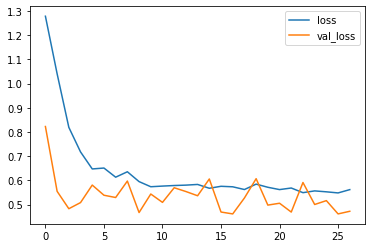

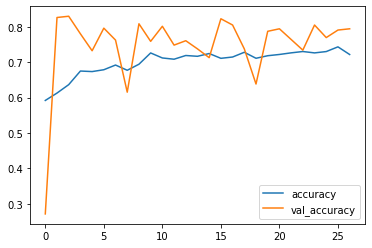

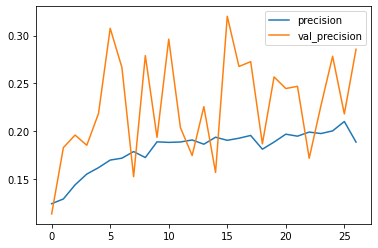

100%|██████████| 564/564 [00:47<00:00, 11.97it/s]


Test set accuracy: 79%


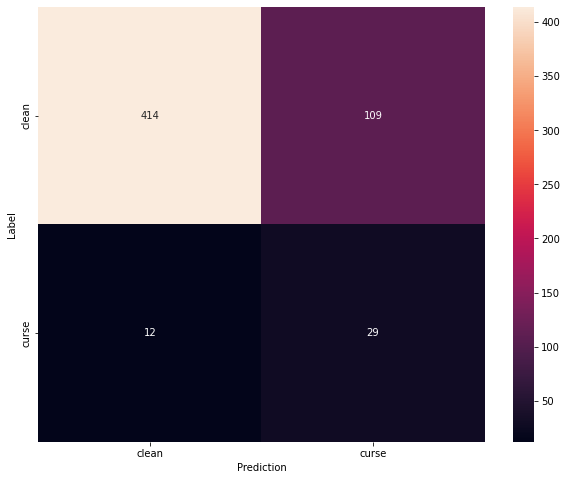

In [4]:
utils_asr.plot_training(history, metric='loss')
utils_asr.plot_training(history, metric='accuracy')
utils_asr.plot_training(history, metric='precision')
utils_asr.inference(classifier=model, test_ds=test_ds)

In [5]:
path_model = '../models/eff-frozen-no-aug-val25-test05-batch64'
model.save(path_model+'.h5')
utils_asr.save_history(history, path_model+'_history.csv')

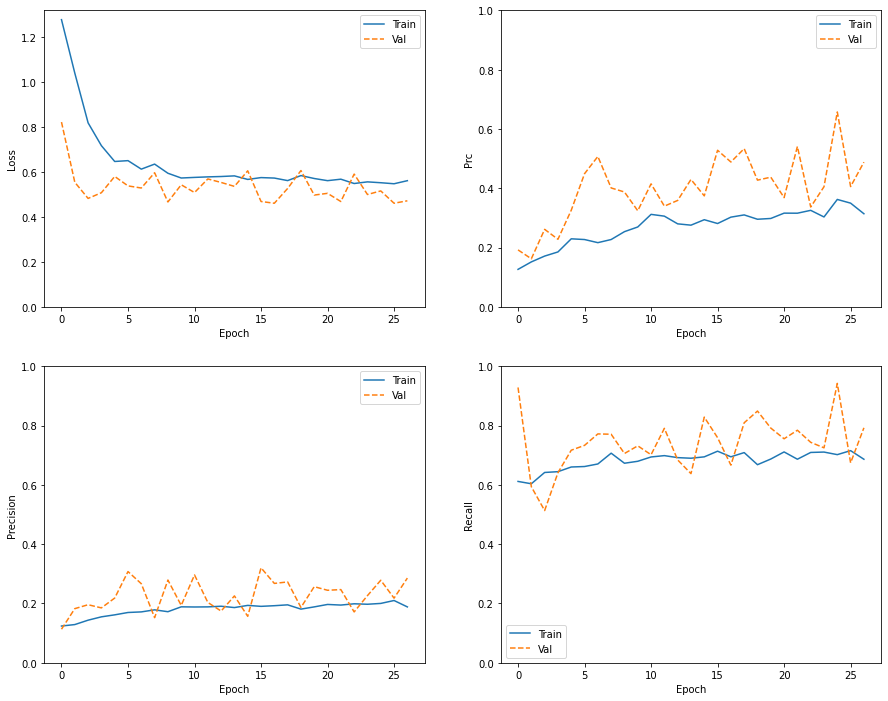

In [9]:
utils_asr.plot_metrics_from_pd(pd.read_csv("../models/eff-frozen-no-aug-val25-test05-batch64_history.csv"))

### wav2vec

In [12]:
history, model, train_ds, val_ds, test_ds = mn.main('../cursedataset-resampled', mode='transfer_wav2vec', val_split=0.25, test_split=0.05, batch_size=64, epochs=50)

Using path:  ../cursedataset-resampled
Number of samples:  11290
Unknown mode:  transfer_wav2vec


In [ ]:
utils_asr.plot_training(history, metric='loss')

In [ ]:
utils_asr.plot_training(history, metric='accuracy')

In [ ]:
utils_asr.plot_training(history, metric='precision')

In [ ]:
utils_asr.inference(classifier=model, test_ds=test_ds)